# Algorithme de Wilson pour la génération d’arbres couvrants uniformes
***
Un graphe $G = (V , E)$ non orienté est défini par l’ensemble de sommets $V$ et l’ensemble $E$ d’arcs, qui sont des
paires de sommets. Un graphe est dit connexe si chaque paire de sommets $i, j$ est reliée par un chemin $(i, i_1 ),
(i_1 , i_2),... (i_k , j)$ d’arcs du graphe. Un graphe est un **arbre** s’il est connexe et ne contient aucun cycle non trivial, ou
de manière équivalente, s’il est connexe et tel que $|E| = |V | − 1$.

Pour un graphe $G = (V , E)$, un **arbre couvrant** de G est un graphe arbre $T = (V(T), E(T))$, tel que $V(T) = V$,
et $E(T)\subset E$. En d’autres termes, $T$ est un arbre constitué d’arcs de $G$ et connectant tous les sommets de $G$. Le
nombre d’arbres couvrants d’un graphe $G$ pouvant être exponentiel en le nombre de sommets de $G$, il n’est a priori
pas évident d’obtenir un arbre couvrant choisi uniformément distribué au hasard.

**L’algorithme de Wilson** permet, pour un graphe non orienté connexe $G$, avec ensemble fini de sommets $V$, de
simuler un arbre couvrant uniformément au hasard parmi tous les arbres couvrants de $G$. Il procède de la manière
suivante.

- **Initialisation**: $T_0 = \{r\}$, arbre réduit à un unique sommet $r \in V$ choisi arbitrairement.

- **Itération, étape $i$**: ayant construit un arbre $T_{i−1}$ , prendre un sommet $u \in V \setminus V (T_{i−1})$, où $V(T_{i−1})$ désigne l’ensemble des sommets de l’arbre $T_{i−1}$.

    1. Engendrer une marche aléatoire $\{U_0,\dots , U_N\}$ sur $G$ partant de $u$, avec probabilités de transition du sommet $k$ vers le sommet $l$ donnée par $P_{k,l} = d_k^{−1} \mathbf{1}_{(k,l) \in E}$ , où $d_k$ est le nombre de voisins de $k$ dans $G^2$, issue de $U_0 = u$, et arrêtée au premier instant $N$ auquel elle atteint l’un des sommets de $T_{i−1}$.
     
    2. Appliquer la procédure suivante d’effacement de boucles à cette marche: pour $$n = \inf\{t \in {1, \dots, N } : \exists s < t \text{ tel que } U_s = U_t\}\text{,}$$ on efface la boucle $U_s , \dots , U_{n−1}$ pour conserver uniquement $U_0,\dots , U_{s−1}, U_n , \dots , U_N$. Itérer cette procédure d’effacement jusqu’à absence de telles boucles. Le chemin résultant est noté $V_0 = u, V_1 ,\dots, V_M = U_N$. On définit alors l’arbre $T_i$ comme l’union de $T_{i−1}$ et du chemin $V_0 , \dots, V_M$.

L’algorithme termine lorsqu’un arbre couvrant est obtenu.

La partie théorique établit que l’algorithme de Wilson produit bien un arbre couvrant uniforme. La partie simulation consiste à mettre en oeuvre cet algorithme.

# 1. Partie théorique

Pour chaque sommet $k$ de $G$ distinct de $r$, on se donne une séquence i.d.d. $\{A^t_k\}_{t\geq 1}$ de voisins de $k$ dans $G$ choisis uniformément au hasard. Ces séquences sont mutuellement indépendantes entre elles.

On interprète ces variables de la manière suivante: dans notre implémentation de l’algorithme de Wilson, la
première fois qu’un sommet k est atteint par une des marches construites, son étape suivante est $A^1_k$; la deuxième fois, l’étape suivante est $A^2_k$, la $t$-ième fois, c'est $A^t_k$. L'ensemble des arcs orientés $(k, A^1_k)$ définit un graphe orienté.

**T1.** On envisage de telles séquences comme des piles (d’épaisseur infinie) de choix aléatoires de voisins pour
chaque sommet $k\neq r$. Considérant le graphe dirigé défini par les choix $A_k^1$ au sommet des piles, si celui-ci contient un cycle orienté $C=k_0, k_1=A^1_{k_0},\cdots , k_0 = A^1_{k_l}$ , on s’autorise à le supprimer, c’est à dire à supprimer du haut des piles associées les choix correspondants $A^1_{k_0}, \cdots, A^1_{k_l}$. Un tel cycle est dit **directement suppressible**.

On appelle cycle toute séquence $C=(k_0, k_1 = A^{t_0}_{k_0},\cdots , k_0 = A^{t_l}_{k_l})$. On dira qu'un cycle $C=(k_0, k_1 = A^{t_0}_{k_0},\cdots , k_0 = A^{t_l}_{k_l})$ est **suppressible** s'il existe une séquence de cycles $C_1, \cdots, C_k = C$ tels qu'on peut supprimer séquentiellement les cycles $C_1$, puis $C_2$, etc. jusqu'à $C_k = C$.

Prouver que pour tout cycle $C$ suppressible, et tout cycle $C'$ directement suppressible, alors on peut supprimer
$C$ via une séquence de cycles qui commence par le cycle $C'$.



***Réponse :***

Soit $C_1, \dots, C_k = C$ une séquence de cycles séquentiellement suppressibles et $C'$ un cycle directement suppressible.

Si $C'$ est disjoint de tous les cycles $C_1, \dots, C_k$, on peut commencer par supprimer $C'$ puis supprimer $C_1, \dots, C_k$ sans problème car les piles modifiées dans la suppression de la séquence $C_1, \dots, C_k$ ne sont pas modifiées par la suppression de $C'$.  

Sinon, considérons le premier cycle $C_i$ qui intersecte $C'$. Après avoir supprimer $C_1, \dots, C_{i-1}$, $C'$ et $C_i$ sont tout deux directement suppressibles. Puisqu'ils s'intersectent en un sommet et qu'ils sont tous les deux en haut des piles, ils sont nécessairement égaux. Donc $C_i$ est directement suppressible et n'a pas de sommet en commun avec les $C_l$, $l<i$.

Par conséquent, la suppression de $C_i$ n'impacte pas la suppression des $C_l$, $l<i$.
Soit $i=k$ et alors la propriété est trivialement vérifiée, soit on peut supprimer les cycles dans l'ordre $C', C_1, \dots, C_{i-1}, C_{i+1}, \dots, C_k$. 

Dans tout les cas, il existe une séquence de cycles commençant par $C'$ permettant de supprimer $C$.

**T2.** En déduire que seuls deux scénarios sont possibles: soit après chaque suppression d’un cycle arbitraire, il reste toujours un cycle qu’on peut encore supprimer (le processus de suppression des cycles ne termine jamais),
soit le processus de suppression des cycles termine, auquel cas les cycles enlevés ne dépendent pas de l’ordre
dans lequel on les a enlevés, et les valeurs au sommet des piles dans la configuration terminale ne dépendent pas
non plus de cet ordre.

***Réponse :***

Supposons que le processus de suppression de cycle termine.

Nous venons de montrer qu'après avoir supprimé un cycle directement suppressible, tous les autres cycles qui étaient suppressibles avant cette suppression le sont encore.

Supposons que le processus de suppression de cycle termine  après avoir supprimé les cycles $C_1, C_2, \dots, C_n$. 

Supposons par l'absurde qu'il existe un cycle $C$ supressible qui n’est pas dans cette liste.

Si $C$ est directement suppressible à l'étape $i \leq n$ du processus de suppression de cycle, d'après ce qu'on vient de voir il l'est encore à l'étape $i+1$. Par récurence $C$ est donc suppressible à la fin de notre processus de suppression, et l'algorithme ne se termine pas après avoir supprimé la séquence $C_1, \dots, C_n$. 

On en conclut que si l’algorithme termine, alors tous les cycles supressibles sont supprimés à un
moment de l’éxecution et que l’ordre de ces supressions n’a pas d’importance. 

Ainsi, soit le processus de suppression de cycle ne termine pas, soit les cycles supprimés ne dépendent pas de l'ordre dans lequel on les supprime.

De plus, si le processus de suppression termine, puisque les cycles enlevés ne dépendent pas de l'ordre dans lequel on les a enlevés, le nombre de sommets supprimés dans chaque pile n'en dépend pas non plus. Donc les valeurs au sommet des piles dans la configuration terminale ne dépendent pas de l'ordre dans lequel les sommets ont été supprimés.

**T3.** Montrer qu’avec probabilité 1, l’algorithme de Wilson termine en un nombre d’étapes fini. En interprétant
l’algorithme de Wilson comme un enlèvement de cycles, en déduire que avec probabilité 1 le processus de suppression des cycles termine.

***Réponse :***

Tout d'abord, montrons que la génération d'une marche aléatoire est une étape se terminant avec une probabilité 1 :

Supposons que nous sommes à l'étape $i$ de l'algorithme. On peut décomposer $V$ est deux parties distinctes non nulles : $A = V(T_{i-1})$ et $B = V \backslash V(T_{i-1})$. Montrons que la marche aléatoire termine avec probabilité 1.

Soit $(m_n)_{n \in \mathbb{N}}$ un marche aléatoire infini, où $m_i$ est le sommet de la marche où on se trouve après $i$ étapes. Puisque la marche aléatoire est infini, on passe une infinité de fois par au moins un sommet de $B$, que l'on nommera $u$. Soit $(t_n)_{n \in \mathbb{N}}$ la suite des temps dans la marche où l'on se situe au noeud $u$.

Considérons maintenant un point $v$ de $A$. Puisque le graphe est connexe, il existe au moins un chemin $P = u = p_0, p_1, \ldots, p_k = v$ allant de $u$ à $v$ et il y a un probabilité non nulle $p$ qu'une marche aléatoire partant de $u$ emprunte exactement ce chemin. **Si $p=1$, alors on n'a rien à vérifier, on peut donc supposer $0<p<1$.**

On s'intéresse à la variable aléatoire $X = \min(i \in \mathbb{N} : m_{t_i} = u, m_{t_i + 1} = p_1, \ldots, m_{t_i + k} = v)$. Puisque la marche aléaoire est un processus sans mémoire, et qu'à chaque fois que l'on se trouve sur $u$, on a un probabilité $p > 0$ de suivre le chemin $P$, la variable aléatoire $X$ suit une loi géométrique de paramètre $p$. **Ainsi, la probabilité de ne pas suivre le chemin $A$ est $1-P(X=\infty) = 1-p^\infty = 1$.**

Ainsi, avec probabilité 1, il existe un temps $t_i$, avec $i \in \mathbb{N}$ tel qu'à $t_i + k$ la marche se trouve au sommet $v$, donc avec probabilité 1, la marche aléatoire atteint $A$ en temps fini.

*Ensuite, comme la marche aléatoire générée est de taille finie, l'algorithme d'effacement des cycles termine.*

*Enfin, à chaque itération i, on ajoute au moins un nouveau sommet à $V(T_i)$ en un nombre fini d'étapes. Donc l'algorithme de Wilson termine en un nombre fini d'itération, et donc d'étapes, avec une probabilité 1.*

Ensuite, interprétons l'algorithme de wilson comme un enlèvement de cycles. 
Tout d'abord, notons que la génération d'une marche aléatoire peut être vu comme le remplissement des piles $\{A_k^t \}_{t\in \mathbb{N}}$, avec $k\in V$ auquel on applique le procédé de suppression des cycles pour supprimer du haut des piles les éléments engendrant des cycles. 

On obtient donc qu'une marche aléatoire fixe le haut de la pile pour $K$ sommets de $V$. Effectivement, lors de la génération d'une marche aléatoire $i$ ($i$-ième m.a), on ne change aucune pile fixée par les m.a $i-1,...,1$. Si on change une de ces piles, alors on aurait rencontré un sommet appartenant à l'arbre à l'ordre $i-1$ et l'algorithme se serait terminé avant de dépiler l'élément.
Ainsi, l'algorithme de wilson peut être vu comme un remplissement des piles $\{A_k^t \}_{k\in V,t\in \mathbb{N}}$, tel que l'état final de ces piles construit l'arbre convrant voulu, en utilisant des marches aléatoires indépendantes après suppression des cycles. 

De plus, $V$ étant fini, on peut noter $V = \{r,v_1,...,v_l\}$.
Prenons un sommet $r\in V$ le sommet racine de notre arbre couvrant. Générons ensuite $(m_1,...,m_l)$ un l-uplet de marche aléatoire (m.a), avec la m.a $m_i$ partant du point $v_i$ et s'arrêtant au point $r$. 

Ensuite, appliquons la suppression de cycle sur chacune de ces m.a, on obtient le l-uplet $(m_1',...,m_l')$. Par définition, chaque $m_i'$ correspond à un chemin allant de $m_i$ à $r$.

Enfin, construisons l'arbre $T(i)$ par récurrence :

- T(0) = le graphe contenant uniquement $r$
- T(i) = T(i-1) auquel on ajoute une partie C du chemin $m_i'$, avec C le chemin partant $v_i$ allant à $v_j \in T(i-2)$ exclu. En l'occurrence, si $v_i\in T(i-2)$, alors C est vide.

Enfin, l'arbre $T(l)$ obtenu est un arbre couvrant. 

Cette algorithme est équivalent à l'algorithme de Wilson où on a généré $|V|-1$ m.a auxquelles on a appliqué l'algorithme de suppression des cycles.

L'algorithme de Wilson est comparable à un enlèvement de cycles.

Comme l'algorithme de Wilson termine avec probabilité 1, alors avec probabilité 1 le processus de suppression des cycles termine.

**T4.** Soit $C_1, \cdots, C_M$ l’ensemble de cycles enlevables étant données les piles $\{A^t_k \}_{t\geq 1}, k\in V\backslash\{r\}$, et soit $\vec{T}$ le graphe orienté, libre de cycles, obtenu dans la configuration terminale après suppression des cycles. Justifier que la collection de cycles $\{C_1, \cdots, C_M \}$ est indépendante de $\vec{T}$. En déduire que l'arbre $T$ obtenu en retirant l’orientation des arcs de $\vec{T}$ est uniformément distribué parmi les arbres couvrants de $G$.

***Réponse :***

Le graphe orienté $\vec{T}$ ne contient aucun cycle et passe par tous les sommets de $V$.

Prenons un cycle $C$ passant par le sommet $u \in V$, on peut le faire commencer et terminer par $u$ car c'est un cyle. On peut construire un graphe $\vec{T'}$ correspondant à l'abre $\vec{T}$ auquel on a rajouté le cycle $C$. 
Par en appliquant l'algorithme de suppression des cycles sur $\vec{T'}$, on obtient $\vec{T}$. 

Par récurrence sur le nombre de cycle, on peut avoir une collection arbitraire de cycle $\{C_1, \cdots, C_M \}$ qu'on ajoute à notre graphe $\vec{T}$ par la méthode précédente, on obtiendra toujours, après l'algorithme de suppression des cycles, le graphe $\vec{T}$.
Par conséquent, quelque soit la collection de cycles $\{C_1, \cdots, C_M \}$, $\vec{T}$ obtenu après suppression de cycle est le même. 

$\vec{T}$ est donc indépendant de cette collection.

Ensuite, lors de la construction de $\vec{T}$, les piles $\{A^t_k\}_{t\geq 1}$ de chacun des sommets $k$ sont des séquences i.i.d des voisins de $k$. 

Après l'algorithme de suppression des cycles, les éléments au sommet des piles construisent le graphe $\vec{T}$. 
De plus, comme les piles du sommet $k$ sont des séquences i.i.d des voisins de $k$, alors le voisin du sommet $k$ dans l'arbre $\vec{T}$ est choisi selon une loi uniforme du nombre de voisins de $k$.
Enfin, on peut conclure que le graphe $\vec{T}$ est obtenu selon une loi uniforme sur le nombre des graphes orientés passant par tous les sommets de $V$, noté $\vec{\mathcal{U}}$.

Le graphe $T$ obtenu en retirant les arcs de $\vec{T}$ est un arbre couvrant de $G$ et suit la loi $2 \vec{\mathcal{U}}$, car $\vec{T}$ et son graphe transposé forment le même arbre $T$.
$T$ est donc uniformément distribué parmi les arbres couvrants de $G$.

# 2. Partie Simulation

**S1.** Implémenter l’algorithme de Wilson: en prenant comme entrée un graphe non orienté $G$, obtenir en sortie un échantillon uniforme d’un arbre couvrant de $G$.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from random import sample
import math


def random_neighbour_from(G, node):
    return sample(list(G.neighbors(node)), 1)[0]


def add_path(T, path):
    for i in range(len(path) - 1):
        T.add_edge(path[i], path[i+1])

def random_walk(G, T):
    diff = set(G.nodes()) - set(T.nodes())
    path = []
    vertex = sample(diff, 1)[0]
    path.append(vertex)
    while vertex in diff:
        vertex = random_neighbour_from(G, vertex)
        path.append(vertex)
    return path


def remove_cycles(path):
    no_cycle = False
    while not no_cycle:
        no_cycle = True
        for i in range(len(path)):
            for j in range(i+1, len(path)):
                if path[i] == path[j]:
                    no_cycle = False
                    path = [path[k]
                            for k in range(len(path)) if not (k >= i and k < j)]
                    break
            if not no_cycle:
                break
    return path


def wilson(G):
    T = nx.Graph()
    start = sample(G.nodes(), 1)[0]
    T.add_node(start)
    while T.number_of_nodes() != G.number_of_nodes():
        path = random_walk(G, T)
        path = remove_cycles(path)
        add_path(T, path)
    return T


def wilson_and_drow(G, pos=None):
    T = wilson(G)
    if pos == None :
        pos = nx.spring_layout(G)
    nx.draw(G, pos=pos, node_size=0)
    nx.draw(T, pos=pos, node_size=0,
            edge_color="#FF0000", width=3.0)
    plt.show()

**S2.** Tester l'algorithme avec $G = (V,E)$ une grille à deux dimensions, i.e. $V=\{(x,y), x\in \{1,\cdots, n \}, y\in \{1,\cdots, n \} \}$ et $E=\{\{ (x,y), (x',y')\} \in V^2 : \lvert x-x' \rvert + \lvert y-y' \rvert = 1 \}$. Engendrer des images de 2 arbres couvrants résultants pour la grille avec $n = 10$, puis avec $n = 50$.

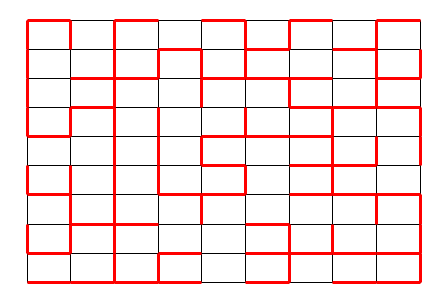

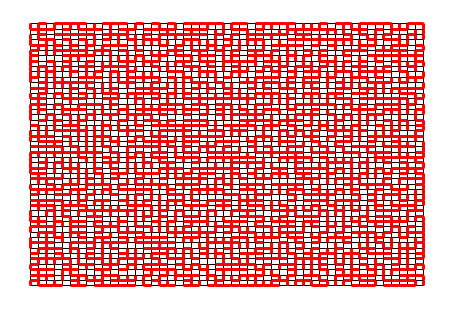

In [4]:
def grid_graph(n):
    G = nx.Graph()
    G.add_nodes_from(range(n*n))
    for i in range(n):
        for j in range(n):
            if i > 0:
                G.add_edge(i*n+j, (i-1)*n+(j))
            if j > 0:
                G.add_edge(i*n+j, (i)*n+(j-1))
            if i < n-1:
                G.add_edge(i*n+j, (i+1)*n+(j))
            if j < n-1:
                G.add_edge(i*n+j, (i)*n+(j+1))
    return G

def grid_pos(n):
    pos = dict()
    for i in range(n):
        for j in range(n):
            pos[i*n+j] = (i, j)
    return pos

wilson_and_drow(grid_graph(10), grid_pos(10))
wilson_and_drow(grid_graph(50), grid_pos(50))

**S3.** Tester l’algorithme avec $G = (V , E)$ une grille triangulaire, i.e. $V=\{(x,y), x\in \{1,\cdots, n \}, y\in \{1,\cdots, x \} \}$ et 

$$ E=\{\{ (x,y), (x',y')\} \in V^2 : soit~x=x'~et~ \lvert y-y' \rvert = 1, ~soit~x'=x+1~et~y'\in \{ y,y+1 \} \} $$

Engendrer des images de 2 arbres couvrants résultants pour la grille triangulaire avec $n = 10$, puis avec $n = 50$.

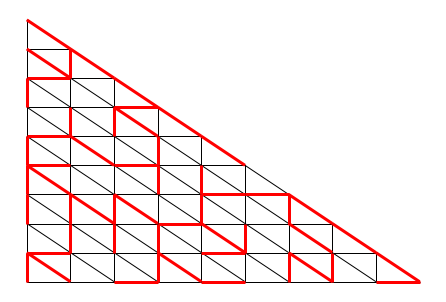

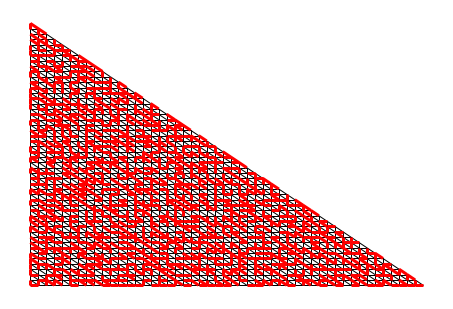

In [3]:
def triangle_coordinate_to_node(i, j):
    return int(i*(i+1)/2+j)


def triangle_graph(n):
    G = nx.Graph()
    vertices = G.add_nodes_from(range(int(n*(n+1)/2)))
    for i in range(n):
        for j in range(i+1):
            if j > 0:
                G.add_edge(triangle_coordinate_to_node(i, j),
                           triangle_coordinate_to_node(i, j-1))
            if j < i:
                G.add_edge(triangle_coordinate_to_node(i, j),
                           triangle_coordinate_to_node(i, j+1))
            if i < n-1:
                G.add_edge(triangle_coordinate_to_node(i, j),
                           triangle_coordinate_to_node(i+1, j))
            if j < i+1 and i < n-1:
                G.add_edge(triangle_coordinate_to_node(i, j),
                           triangle_coordinate_to_node(i+1, j+1))
    return G


def triangle_pos(n):
    pos = dict()
    for i in range(n):
        for j in range(i+1):
            pos[triangle_coordinate_to_node(i, j)] = (-i, j)
    return pos

wilson_and_drow(triangle_graph(10), triangle_pos(10))
wilson_and_drow(triangle_graph(50), triangle_pos(50))

**(Optionnel) S4.** Tester l'algorithme sur le graphe complet $G = (V, E)$. 

Engendrer des images de 2 arbres couvrants résultants pour le graphe complet avec $n = 10$, puis avec $n = 50$.

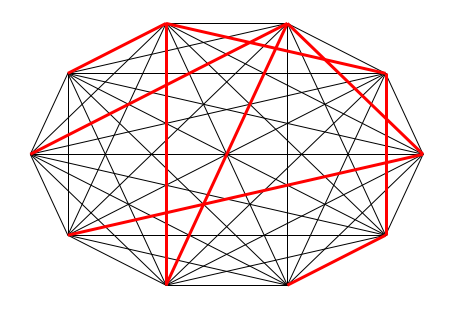

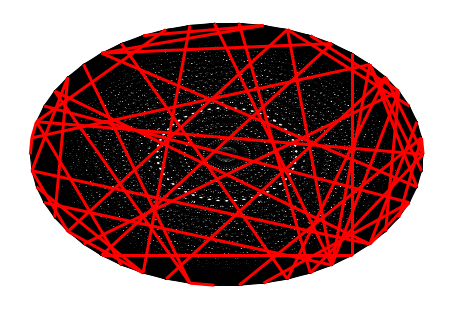

In [22]:
def complete_graph(n):
    G = nx.Graph()
    G.add_nodes_from(range(n))
    for i in range(n):
        for j in range(n):
            G.add_edge(i, j)
    return G


def complete_pos(n):
    pos = dict()
    module = n
    for i in range(n):
        arg1 = module * math.cos(2 * math.pi * i / n)
        arg2 = module * math.sin(2 * math.pi * i / n)
        pos[i] = (arg1, arg2)
    return pos

wilson_and_drow(complete_graph(10), complete_pos(10))
wilson_and_drow(complete_graph(50), complete_pos(50))